In [5]:
import pyvista as pv


class MyCustomRoutine:
    def __init__(self, mesh):
        self.output = mesh  # Expected PyVista mesh type
        # default parameters
        self.kwargs = {
            'radius': 0.5,
            'theta_resolution': 30,
            'phi_resolution': 30,
        }

    def __call__(self, param, value):
        self.kwargs[param] = value
        self.update()

    def update(self):
        # This is where you call your simulation
        result = pv.Sphere(**self.kwargs)
        self.output.copy_from(result)
        return
    
starting_mesh = pv.Sphere()
engine = MyCustomRoutine(starting_mesh)


  File "C:\Users\pho\AppData\Local\Temp\ipykernel_29660\2108038255.py", line 4, in <lambda>
    callback=lambda value: engine('phi_resolution', int(value)),
  File "C:\Users\pho\AppData\Local\Temp\ipykernel_29660\3632939314.py", line 16, in __call__
    self.update()
  File "C:\Users\pho\AppData\Local\Temp\ipykernel_29660\3632939314.py", line 21, in update
    self.output.copy_from(result)
  File "k:\FastSwap\AppData\VSCode\yellow\.venv_yellow\lib\site-packages\pyvista\core\dataset.py", line 119, in __getattr__
    return super().__getattribute__(item)
AttributeError: 'PolyData' object has no attribute 'copy_from'
  File "C:\Users\pho\AppData\Local\Temp\ipykernel_29660\2108038255.py", line 13, in <lambda>
    callback=lambda value: engine('theta_resolution', int(value)),
  File "C:\Users\pho\AppData\Local\Temp\ipykernel_29660\3632939314.py", line 16, in __call__
    self.update()
  File "C:\Users\pho\AppData\Local\Temp\ipykernel_29660\3632939314.py", line 21, in update
    self.output.

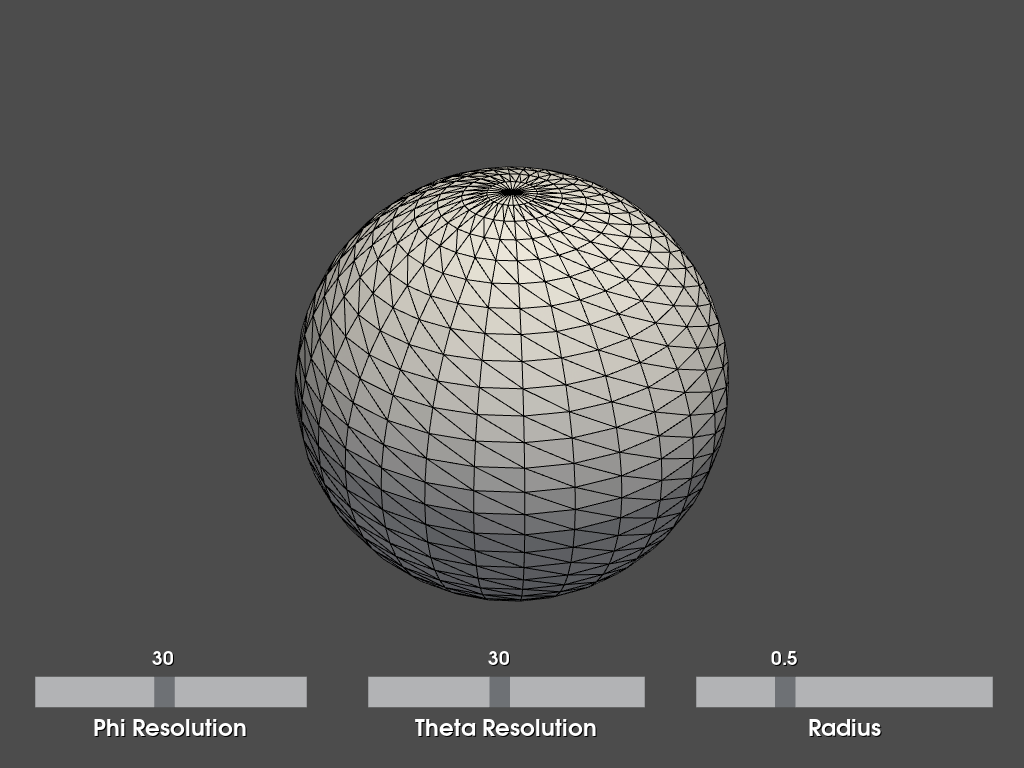

In [6]:
p = pv.Plotter()
p.add_mesh(starting_mesh, show_edges=True)
p.add_slider_widget(
    callback=lambda value: engine('phi_resolution', int(value)),
    rng=[3, 60],
    value=30,
    title="Phi Resolution",
    pointa=(0.025, 0.1),
    pointb=(0.31, 0.1),
    style='modern',
)
p.add_slider_widget(
    callback=lambda value: engine('theta_resolution', int(value)),
    rng=[3, 60],
    value=30,
    title="Theta Resolution",
    pointa=(0.35, 0.1),
    pointb=(0.64, 0.1),
    style='modern',
)
p.add_slider_widget(
    callback=lambda value: engine('radius', value),
    rng=[0.1, 1.5],
    value=0.5,
    title="Radius",
    pointa=(0.67, 0.1),
    pointb=(0.98, 0.1),
    style='modern',
)
p.show()

update(...)
update(...)


k:\FastSwap\AppData\VSCode\yellow\.venv_yellow\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


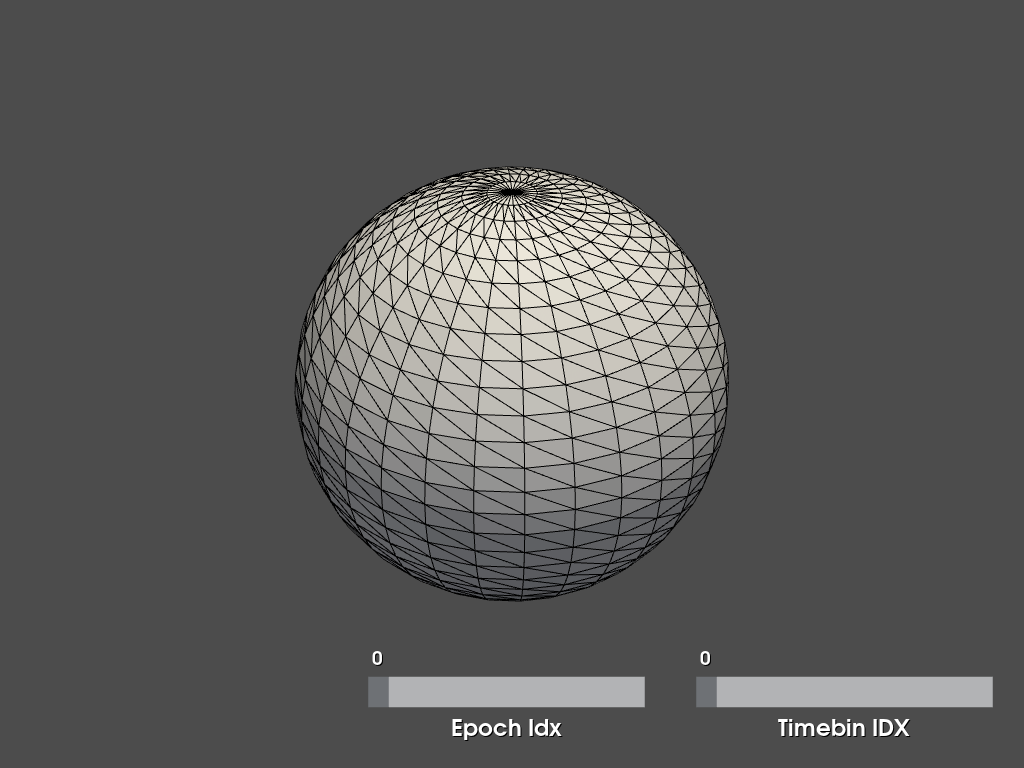

In [10]:
class CustomTimeAnimationRoutine:
    def __init__(self, mesh):
        self.output = mesh  # Expected PyVista mesh type
        # default values for each of the parameters
        self.kwargs = {
            'epoch': 0,
            'time_bin': 0,
            # 'theta_resolution': 30,
            # 'phi_resolution': 30,
        }

    def __call__(self, param, value):
        self.kwargs[param] = value
        self.update()

    def update(self):
        # This is where you call your simulation
        # result = pv.Sphere(**self.kwargs)
        # self.output.copy_from(result)
        print(f'update(...)')
        return
    
num_filter_epochs: int = 60
curr_num_epoch_time_bins: int = 312

starting_mesh = pv.Sphere()
p = pv.Plotter()
p.add_mesh(starting_mesh, show_edges=True)
storage_engine = CustomTimeAnimationRoutine(starting_mesh)
epoch_slider = p.add_slider_widget(
    callback=lambda value: storage_engine('epoch', int(value)), # triggering .__call__(self, param='epoch', value)....
    rng=[0, num_filter_epochs-1],
    value=0,
    title="Epoch Idx",
    pointa=(0.35, 0.1),
    pointb=(0.64, 0.1),
    style='modern',
)
time_bin_slider = p.add_slider_widget(
    callback=lambda value: storage_engine('time_bin', value),
    rng=[0, curr_num_epoch_time_bins-1],
    value=0,
    title="Timebin IDX",
    pointa=(0.67, 0.1),
    pointb=(0.98, 0.1),
    style='modern',
)
p.show()

In [11]:
epoch_slider # vtkSliderWidget


(vtkmodules.vtkInteractionWidgets.vtkSliderWidget)000001FA8EA53880

In [15]:
time_bin_slider.GetRepresentation().SetMaximumValue(5)
time_bin_slider.GetRepresentation().SetValue(time_bin_slider.GetRepresentation().GetMinimumValue())
